## Binairy Classification Pizza or not Pizza
We will train 3 different models to binairy classify wether or not the picture has a pizza in it

## Model1
The first model (model) consists of two Conv2D convolutional layers, each followed by a MaxPooling2D layer for downsampling, then a Flatten layer, and two Dense layers (one for the hidden layer and one for the output layer).

## Model2
The second model (model2) is similar to the first model but has an additional Conv2D and MaxPooling2D layer. This means it has three Conv2D layers and three MaxPooling2D layers in total. The additional layers may allow the model to learn more complex features from the images.

## Model3
The third model (model3) is a simpler model with only one Conv2D layer and one MaxPooling2D layer. This model may be faster to train but might not perform as well as the other two models since it has less capacity to learn complex features.

## Prediction
So my prediction is that model 2 will be the best fit for this specific topic, it might take longer than the other models but it will probably do the best on unseen data.

## Imports

In [121]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Load the images

In [122]:
# Define the parameters for the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Define the directory where the images are stored
image_directory = '.' # '.' To declare the current folder

# The generator will read images from the directory and assign labels based on subdirectories
train_generator = datagen.flow_from_directory(
    image_directory,
    target_size=(150, 150),  # Resize the images to 150x150 pixels
    batch_size=32,
    class_mode='binary',  # Because you have two classes, pizza and not pizza
    subset='training')  # Set as training data

validation_generator = datagen.flow_from_directory(
    image_directory,  # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation')  # set as validation data


Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


## Visualize the data

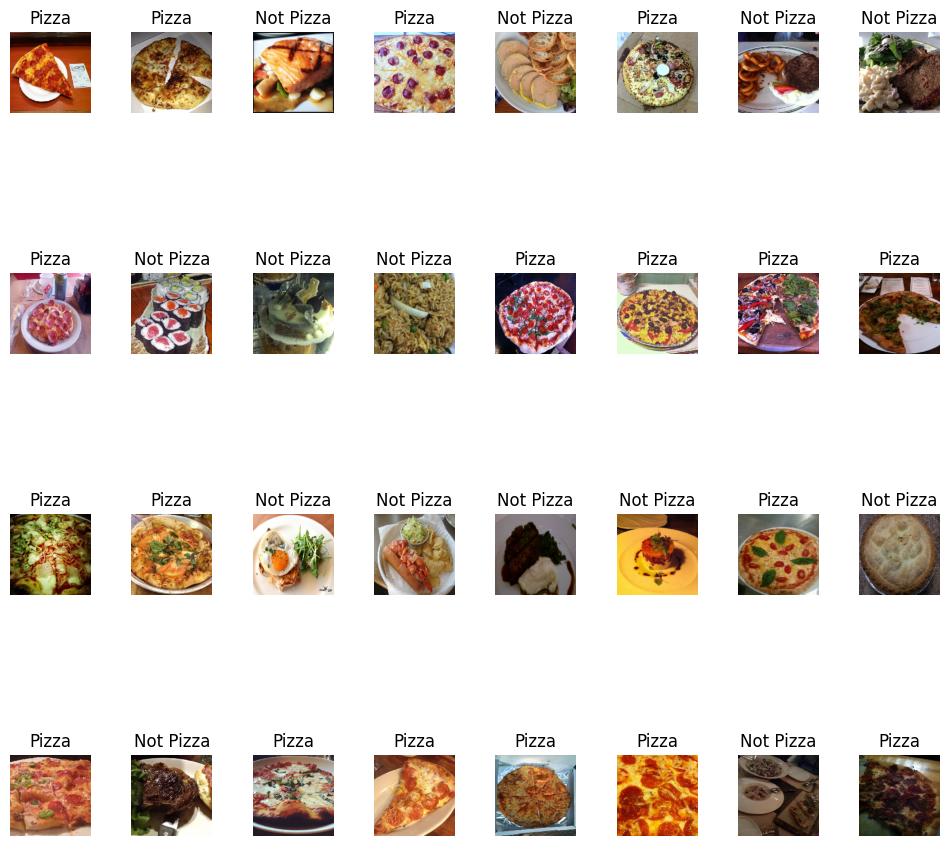

In [123]:
# Get the class labels
class_labels = train_generator.class_indices

# Get the first batch of images and labels
images, labels = next(train_generator)

# Define the number of rows and columns for the plot
rows, cols = 4, 8

# Initialize the plot
fig, ax = plt.subplots(rows, cols, figsize=(12,12))
ax = ax.ravel()

for i in range(0, rows*cols): # create a grid with 4 rows and 8 columns
    ax[i].imshow(images[i]) # plot the image
    if labels[i] == 1.0:
        label = 'Pizza'
    else:
        label = 'Not Pizza'
    ax[i].set_title(label) # set the class as title
    ax[i].axis('off') # remove the axes

plt.subplots_adjust(wspace=0.5) # adjust the space between the images
plt.show() # display the plot


## Creating a model

In [124]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add a convolutional layer
# Because it is effective in identifying features or patterns in the input data, such as edges, shapes, or textures.
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

# Add a pooling layer
# Because it reduces spatial dimensions, reduces the computational cost and prevents overfitting
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
# Flattening is needed to convert the 2D matrix into a vector so a dense layer can use it
model.add(Flatten())

# Add a fully connected layer
# Dense layers are used in the decision-making part of the model.
model.add(Dense(units=128, activation='relu'))

# Add the output layer
# The sigmoid activation function is used in to output the probability of the binairy classification.
model.add(Dense(units=1, activation='sigmoid'))



## Fit the Model

In [126]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    steps_per_epoch = train_generator.samples // 32,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // 32,
                    epochs = 5)

# Save the model
model.save('my_model.keras')

Epoch 1/5
49/49 [==============================] - 17s 327ms/step - loss: 0.8175 - accuracy: 0.5344 - val_loss: 0.6824 - val_accuracy: 0.5651
Epoch 2/5
49/49 [==============================] - 15s 311ms/step - loss: 0.6554 - accuracy: 0.6071 - val_loss: 0.6039 - val_accuracy: 0.7057
Epoch 3/5
49/49 [==============================] - 16s 336ms/step - loss: 0.5651 - accuracy: 0.7082 - val_loss: 0.5568 - val_accuracy: 0.7005
Epoch 4/5
49/49 [==============================] - 17s 341ms/step - loss: 0.4839 - accuracy: 0.7672 - val_loss: 0.5840 - val_accuracy: 0.6797
Epoch 5/5
49/49 [==============================] - 20s 406ms/step - loss: 0.3623 - accuracy: 0.8554 - val_loss: 0.6163 - val_accuracy: 0.7188


## Plot the first model

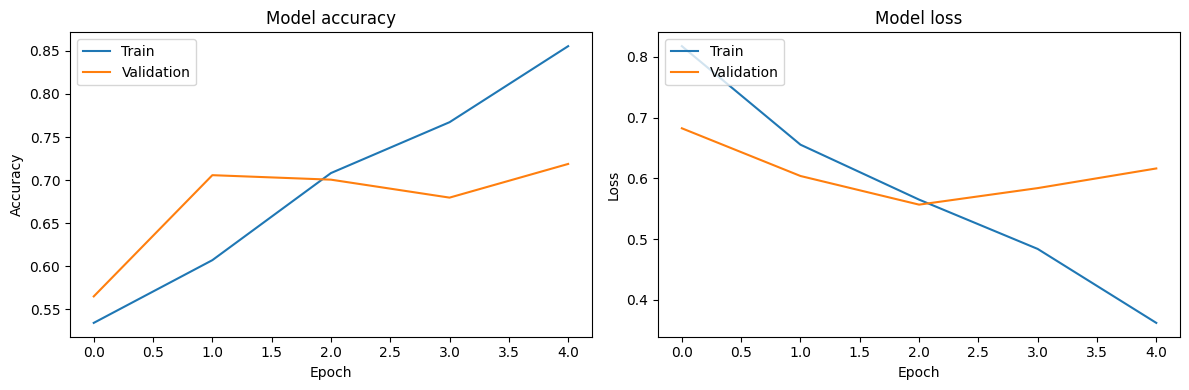

In [127]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Train other models


In [ ]:
# Initialize the second model
model2 = Sequential()

# Add a convolutional layer with 32 filters and a kernel size of 3x3, using ReLU activation function
model2.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

# Add a pooling layer with a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolutional layer with 64 filters and a kernel size of 3x3, using ReLU activation function
model2.add(Conv2D(64, (3, 3), activation='relu'))

# Add another pooling layer with a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer with 128 filters and a kernel size of 3x3, using ReLU activation function
model2.add(Conv2D(128, (3, 3), activation='relu'))

# Add a third pooling layer with a pool size of 2x2
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
# Flattening is needed to convert the 2D matrix into a vector so a dense layer can use it
model2.add(Flatten())

# Add a fully connected layer with 128 units and ReLU activation function
model2.add(Dense(units=128, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model2.add(Dense(units=1, activation='sigmoid'))

# Compile the model with Adam optimizer, binary cross-entropy loss function, and accuracy as a metric
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the second model
history2 = model2.fit(train_generator, 
                    steps_per_epoch = train_generator.samples // 32,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // 32,
                    epochs = 5)

# Save the second model
model2.save('my_model2.keras')

Epoch 1/5
49/49 [==============================] - 26s 489ms/step - loss: 0.6937 - accuracy: 0.5837 - val_loss: 0.6065 - val_accuracy: 0.7318
Epoch 2/5
49/49 [==============================] - 24s 492ms/step - loss: 0.5904 - accuracy: 0.6926 - val_loss: 0.5593 - val_accuracy: 0.7318
Epoch 3/5
49/49 [==============================] - 23s 474ms/step - loss: 0.5313 - accuracy: 0.7406 - val_loss: 0.5366 - val_accuracy: 0.7604
Epoch 4/5
49/49 [==============================] - 23s 473ms/step - loss: 0.4629 - accuracy: 0.7776 - val_loss: 0.5213 - val_accuracy: 0.7630
Epoch 5/5
49/49 [==============================] - 23s 467ms/step - loss: 0.4221 - accuracy: 0.8119 - val_loss: 0.5293 - val_accuracy: 0.7396


## Plot the 2nd model

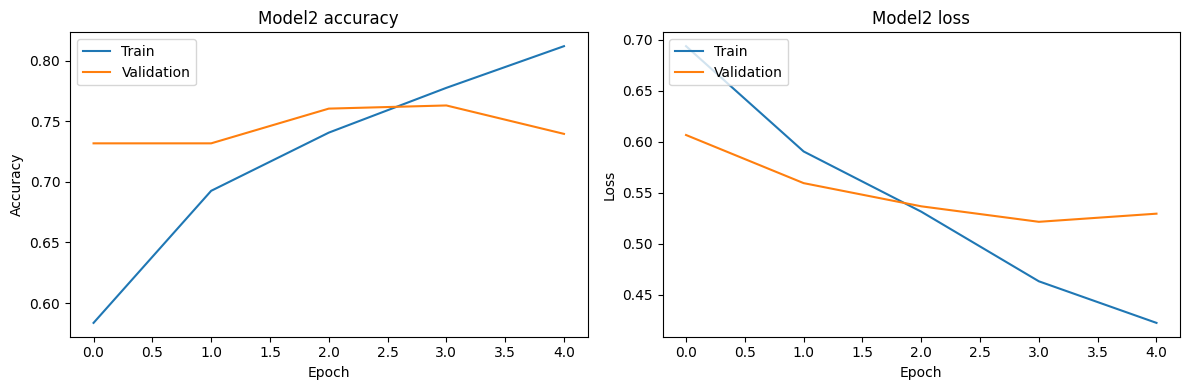

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for the second model
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 loss')
plt.ylabel('Loss')  
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Initialize the third model
model3 = Sequential()

# Add a convolutional layer with 32 filters and a kernel size of 3x3, using ReLU activation function
model3.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))

# Add a pooling layer with a pool size of 2x2
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
# Flattening is needed to convert the 2D matrix into a vector so a dense layer can use it
model3.add(Flatten())

# Add a fully connected layer with 128 units and ReLU activation function
model3.add(Dense(units=128, activation='relu'))

# Add the output layer with 1 unit and sigmoid activation function for binary classification
model3.add(Dense(units=1, activation='sigmoid'))

# Compile the model with Adam optimizer, binary cross-entropy loss function, and accuracy as a metric
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the third model
history3 = model3.fit(train_generator, 
                    steps_per_epoch = train_generator.samples // 32,
                    validation_data = validation_generator, 
                    validation_steps = validation_generator.samples // 32,
                    epochs = 5)

# Save the third model
model3.save('my_model3.keras')

Epoch 1/5
49/49 [==============================] - 19s 374ms/step - loss: 1.2630 - accuracy: 0.5927 - val_loss: 0.8164 - val_accuracy: 0.5417
Epoch 2/5
49/49 [==============================] - 18s 372ms/step - loss: 0.4782 - accuracy: 0.7866 - val_loss: 0.5206 - val_accuracy: 0.7682
Epoch 3/5
49/49 [==============================] - 18s 372ms/step - loss: 0.2943 - accuracy: 0.8911 - val_loss: 0.6521 - val_accuracy: 0.6406
Epoch 4/5
49/49 [==============================] - 19s 397ms/step - loss: 0.1590 - accuracy: 0.9559 - val_loss: 0.6624 - val_accuracy: 0.6615
Epoch 5/5
49/49 [==============================] - 19s 383ms/step - loss: 0.1085 - accuracy: 0.9741 - val_loss: 0.6400 - val_accuracy: 0.7109


## Plot the 3rd model

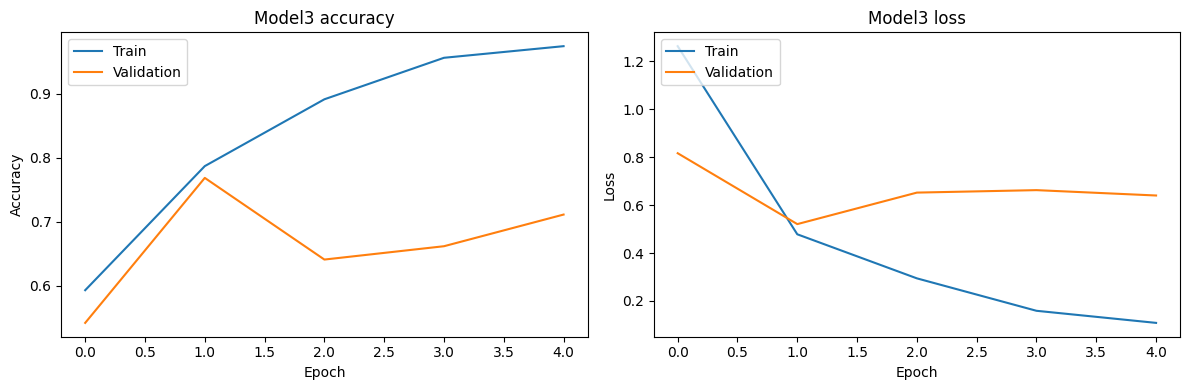

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model3 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for the third model
plt.subplot(1, 2, 2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Summary

## Model 1:
- Accuracy: The training accuracy increases significantly over epochs, which is good, but the validation accuracy remains   relatively flat and much lower than the training accuracy, indicating potential overfitting.
- Loss: The training loss decreases, but the validation loss increases after the first epoch, which is a clear sign of overfitting.

## Model 2:
- Accuracy: The training and validation accuracy lines are close together, and both increase over time. The final accuracy on the validation set is quite high and close to the training accuracy, which is a good sign.
- Loss: The training and validation loss both decrease over time and follow each other closely, indicating good generalization.

## Model 3:
- Accuracy: The training accuracy is high, but the validation accuracy decreases after the first epoch, suggesting overfitting.
- Loss: The training loss decreases, but the validation loss increases, which again indicates overfitting.

## Conclusion
Based on these observations, Model 2 appears to be the best model. It shows a good balance between training and validation accuracy and loss, indicating that it generalizes well to new data. The other two models show signs of overfitting, where they perform well on the training data but not as well on the validation data.